In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  ##warning sign 출력 무시
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ##scientific notation 삭제
plt.rcParams['font.family'] = 'Malgun Gothic'  ##한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False    ##마이너스기호 깨짐 방지

In [2]:
import konlpy

## 실습 데이터로 사용할 헌법조문 데이터 불러오기
corpus = konlpy.corpus.kolaw.open(konlpy.corpus.kolaw.fileids()[0]).read()

In [ ]:
corpus

In [ ]:
## 텍스트를 단어단위로 나누기
kkma = konlpy.tag.Kkma().morphs
kkma(corpus)

In [ ]:
okt = konlpy.tag.Okt().morphs
okt(corpus)

In [6]:
from nltk import Text

NLTK의 Text 모듈은 자연어처리에서 유용한 기능들을 제공해준다. 

1. 특정 단어의 등장횟수 세기

In [11]:
law.count('국민')

61

In [12]:
## 참고 (특정 단어가 차지하는 비율 확인하기)
law.vocab().freq('국민')

0.006934970441109595

2. 가장 많이 등장한 단어를 뽑기

In [7]:
law = Text(okt(corpus))
law.vocab().most_common(20)

[('의', 380),
 ('.', 357),
 ('에', 282),
 ('을', 211),
 ('\n', 195),
 ('은', 179),
 ('제', 178),
 ('이', 176),
 ('한다', 155),
 ('·', 145),
 ('를', 130),
 ('\n  ', 130),
 ('법률', 127),
 ('는', 119),
 ('한', 101),
 (',', 101),
 ('할', 100),
 ('정', 89),
 ('수', 88),
 ('대통령', 83)]

3. 특정 단어와 함께 나타난 빈도가 높은 단어를 확인하기

In [9]:
law.similar('국민')

국회 국가 대한민국 조국 정부 헌법재판소 법관 타인 판결 근로 여자 국회의원 대통령 국정 국무회의 법령 정치 장 권력 국군


4. 특정 단어가 전체 text에서 나타나는 위치 확인

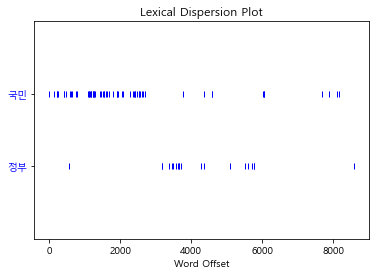

In [10]:
law.dispersion_plot(['국민', '정부'])

# 워드클라우드 만들기

In [17]:
from wordcloud import WordCloud
from collections import Counter   ##텍스트의 빈도수를 추출
from konlpy.tag import Okt        ##형태소를 나눌 사전 선택
from PIL import Image             ##지정한 모양에 따라 워드클라우드가 그려지게 함
import matplotlib.pyplot as plt   ##Python상에서 그래프를 그리는 패키지

참고) PIL 패키지 설치는 !pip install Pillow 명령어로 수행

In [18]:
## 대한민국 헌법을 말뭉치(corpus)로 불러오기
corpus = konlpy.corpus.kolaw.open(konlpy.corpus.kolaw.fileids()[0]).read()

In [19]:
okt = Okt()                                                                     ##말뭉치의 형태소를 분류할 형태소분석기 추출
nouns = okt.nouns(corpus)                                                       ##nouns(명사)에 해당하는 형태소만 추출
words = [n for n in nouns if len(n) > 1]                                       ##단어의 길이가 1개인 것은 제외

count_words = Counter(words)                                                    ##각 단어의 개수(빈도)를 세서 저장

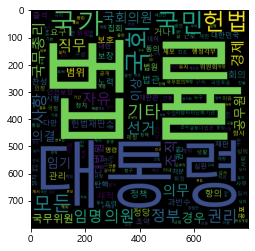

In [23]:
wc = WordCloud(font_path = 'malgun', width = 400, height = 400, scale = 2.0, max_font_size = 250)
gen = wc.generate_from_frequencies(count_words)                               ##단어 빈도에 따른 wordcloud를 생성
plt.figure()
plt.imshow(gen)

모양을 설정한 워드클라우드를 그리고 싶다면 모양을 검은색으로 설정하고 흰 바탕을 가진 그림파일을 지정하고 아래 코드를 이용해 그릴 수 있다.  (검은색 = 0인 0~255 사이의 numpy array로 그림을 변환함)  
이때 그림파일의 확장자는 jpg를 이용한다 (png 파일의 경우 그림의 검은색을 제대로 인식하지 못함)

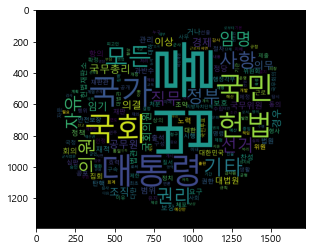

In [27]:
## 배경
img = Image.open('wordcloud용이미지.png.jpg')
img_array = np.array(img)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=200, mask=img_array)
gen = wc.generate_from_frequencies(count_words)

plt.figure()
plt.imshow(gen)

In [28]:
## 만들어진 그래프를 그림파일로 추출하기
wc.to_file('워드클라우드.png')